In [1]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
import acquire
import prepare

In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Modeling Exercises:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

____________________________

In [4]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())
train.head()

/Users/natasharivers/codeup-data-science/database-exercises/Classifications/prepare.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = imputer.transform(test[['age']])


,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0


In [5]:
#get value counts of survived (1) vs did not survive (0)
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

### #1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [6]:
#create the baseline
train["baseline"] = 0
baseline_accuracy = (train.survived == train.baseline).mean()
print(f'Baseline accuracy is: {baseline_accuracy:.2%}')

Baseline accuracy is: 61.77%


_________________________

### #2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
#identify columns that you want to use

#only using the following columns
X_cols = ['pclass', 'fare', 'alone', 'Q', 'S']

#only trying to see who survived or died
y_col = 'survived'

In [8]:
#split your data - train, validate, test

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [9]:
#identify model 1 
model1 = DecisionTreeClassifier()

In [10]:
#fit model 1 using train data
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
#get scores for train and validate, not using test yet
print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 85.92%
validate score: 71.50%


In [12]:
#model 1 is the prediction
train['model1'] = model1.predict(X_train)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S,baseline,model1
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0,0,1
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1,0,0
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0,0,1
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0,0,1


_________________

### #3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [13]:
#model 1 score
# code == model1.score(X_train, y_train)
print(f'model1 score: {model1.score(X_train, y_train):.2%}')

model1 score: 85.92%


In [14]:
# confusion matrix
pd.crosstab(train.survived, train.model1)

model1,0,1
survived,,
0,298,9
1,61,129


In [15]:
#classification report
print(classification_report(train.survived, train.model1, zero_division =True))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       307
           1       0.93      0.68      0.79       190

    accuracy                           0.86       497
   macro avg       0.88      0.82      0.84       497
weighted avg       0.87      0.86      0.85       497



__________________

### #4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [16]:
#to get percentage, normalize=true
pd.crosstab(train.survived, train.model1, normalize=True)

model1,0,1
survived,,
0,0.599598,0.018109
1,0.122736,0.259557


positive- died (0)
<br>
negative - survived (1)

- **True positive** - 59.96%
- **False Postive** - 11.27% (predict they died, but they lived)
- **True Negative** - 25.96%
- **False Negative** - 1.81% (predict they lived, but they died)

In [17]:
pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.830084,0.934783,0.859155,0.882433,0.870109
recall,0.970684,0.678947,0.859155,0.824816,0.859155
f1-score,0.894895,0.786585,0.859155,0.840740,0.853489
support,307.000000,190.000000,0.859155,497.000000,497.000000


In [18]:
#Precision = TP / (TP+FP)
precision= 298 / (298+61)
precision

0.83008356545961

In [19]:
#computer is using the (1- survived) as a positive
precision_score(train.survived, train.model1)

0.9347826086956522

In [20]:
#Recall = TP/ (TP+FN)
recall= 298/ (298+9)
recall

0.9706840390879479

In [21]:
#computer is using the (1- survived) as a positive
recall_score(train.survived, train.model1)

0.6789473684210526

In [22]:
#Accuracy = TP+TN/(TP +TN+FN+FP)
accuracy= (298+129) / (298+129+61+9)
accuracy

0.8591549295774648

In [23]:
accuracy_score(train.survived, train.model1)

0.8591549295774648

In [24]:
#OR make classification_report its own value
cr= pd.DataFrame(classification_report(train.survived, train.model1, zero_division =True, output_dict=True))

In [25]:
#call classification variable- column 1
cr['0']

precision      0.830084
recall         0.970684
f1-score       0.894895
support      307.000000
Name: 0, dtype: float64

_________________________

### #5. Run through steps 2-4 using a different max_depth value.

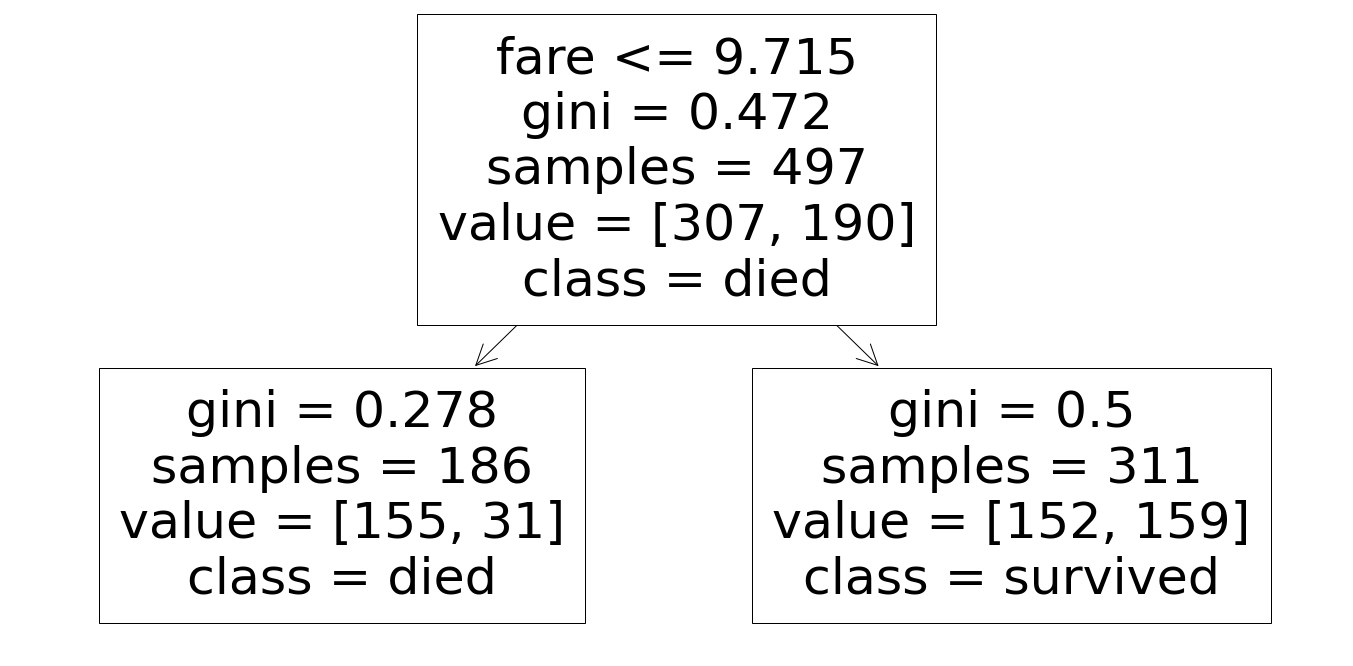

In [26]:
model2 = DecisionTreeClassifier(max_depth=1)
model2.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model2, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [27]:
#max_depth = 1 score
# code == model2.score(X_train, y_train)
print(f'model2 score: {model2.score(X_train, y_train):.2%}')

model2 score: 63.18%


##### Model 2 gives a score of 63.18% accuracy

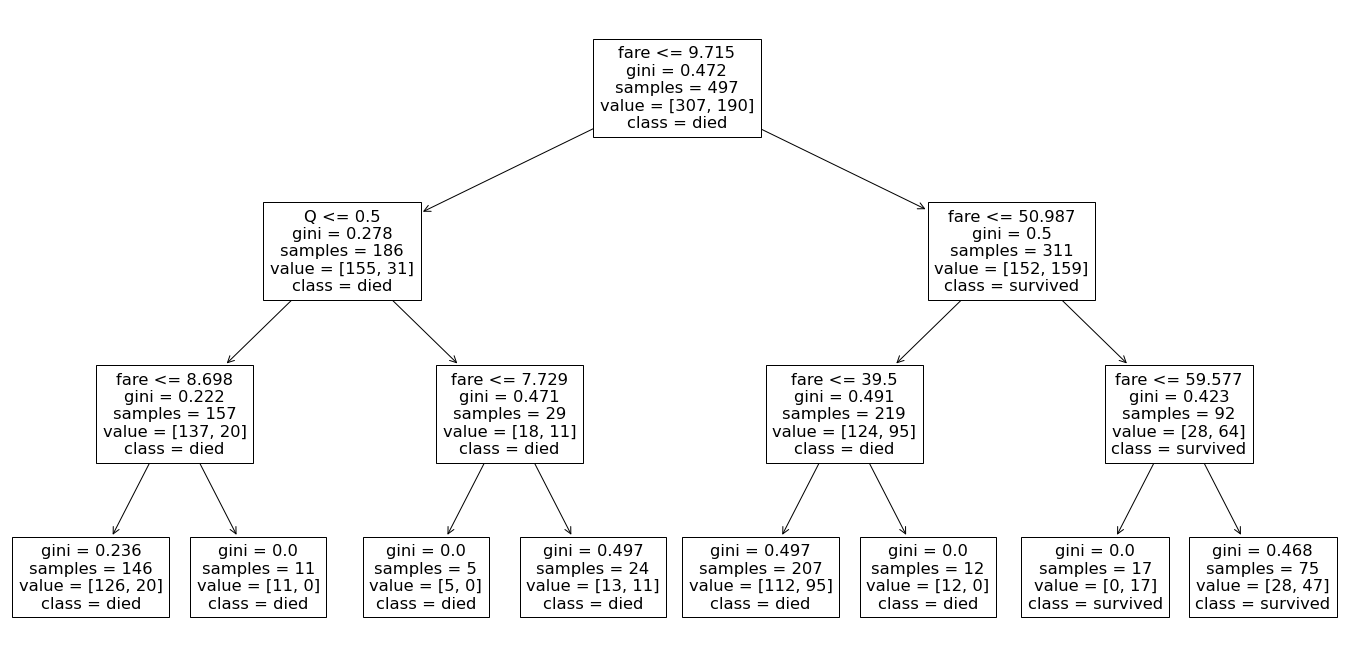

In [28]:
model3 = DecisionTreeClassifier(max_depth=3)
model3.fit(X_train, y_train)

plt.figure(figsize=(24,12))

plot_tree(model3, feature_names=X_train.columns.tolist(), class_names=['died', 'survived'])
plt.show()

In [29]:
#max_depth = 3 score
# code == model3.score(X_train, y_train)
print(f'model3 score: {model3.score(X_train, y_train):.2%}')

model3 score: 69.01%


##### Model 3 gives a score of 69.01% accuracy

____________________

### #6. Which model performs better on your in-sample data?

Model 1 (with default max_depth=0) did the best of all three models with an accuracy of 85.92%

___________________________

### #7 Which model performs best on your out-of-sample data, the validate set?

In [30]:
model1.fit(X_validate, y_validate)

DecisionTreeClassifier()

In [31]:
print(f'model1 score: {model1.score(X_validate, y_validate):.2%}')

model1 score: 85.51%


In [32]:
model2.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=1)

In [33]:
print(f'model2 score: {model2.score(X_validate, y_validate):.2%}')

model2 score: 71.50%


In [34]:
model3.fit(X_validate, y_validate)

DecisionTreeClassifier(max_depth=3)

In [35]:
print(f'model3 score: {model3.score(X_validate, y_validate):.2%}')

model3 score: 73.83%


#### Model 3 has the highest accuracy in validate set

<hr style="border:2px solid blue"> </hr>

# Random Forest Exercises:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.
<br>

2. Evaluate your results using the model score, confusion matrix, and classification report.
<br>

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.
<br>

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.
<br>

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [37]:
from pydataset import data
from sklearn.model_selection import train_test_split
import pandas as pd
import acquire
import prepare

In [38]:
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [39]:
#get to know data
train.shape, validate.shape, test.shape

((497, 12), (214, 12), (178, 12))

In [40]:
#only using the following columns
X_cols = ['pclass', 'fare', 'alone', 'Q', 'S']

#only trying to see who survived or died
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [41]:
#look to see if we have nulls or columns to drop
train.info()

#data looks to be ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     497 non-null    int64  
 1   pclass       497 non-null    int64  
 2   sex          497 non-null    object 
 3   age          497 non-null    float64
 4   sibsp        497 non-null    int64  
 5   parch        497 non-null    int64  
 6   fare         497 non-null    float64
 7   class        497 non-null    object 
 8   embark_town  497 non-null    object 
 9   alone        497 non-null    int64  
 10  Q            497 non-null    uint8  
 11  S            497 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(2)
memory usage: 43.7+ KB


In [42]:
#take a look at X_train
X_train.head()

,pclass,fare,alone,Q,S
583,1,40.1250,1,0,0
337,1,134.5000,1,0,0
50,3,39.6875,0,0,1
218,1,76.2917,1,0,0
31,1,146.5208,0,0,0


In [43]:
y_train.head()

583    0
337    1
50     0
218    1
31     1
Name: survived, dtype: int64

#### #1 Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [44]:
#make our thing
clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 10, random_state= 123)

In [45]:
#fit the thing (ONLY on train set!!)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [46]:
#use the thing (on training set)
y_pred = clf.predict(X_train)

In [47]:
#shows an array of y_predictions
#y_pred

#### #2 Evaluate your results using the model score, confusion matrix, and classification report.

In [48]:
#model score
clf.score(X_train, y_train)

0.8551307847082495

In [49]:
#model score for validate set
clf.score(X_validate, y_validate)

0.7383177570093458

In [50]:
train['model5'] = clf.predict(X_train)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S,model5
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0,1
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1,0
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0,1
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0,1


In [51]:
#confusion matrix- created manually with crosstab
pd.crosstab(train.survived, train.model5)

model5,0,1
survived,,
0,288,19
1,53,137


In [52]:
#get percentage to answer question
pd.crosstab(train.survived, train.model5, normalize=True)

model5,0,1
survived,,
0,0.579477,0.038229
1,0.106640,0.275654


In [53]:
#classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.844575,0.878205,0.855131,0.861390,0.857431
recall,0.938111,0.721053,0.855131,0.829582,0.855131
f1-score,0.888889,0.791908,0.855131,0.840398,0.851814
support,307.000000,190.000000,0.855131,497.000000,497.000000


#### #3 Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [54]:
print(f'Random Forest Model 5 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 5 Precision score is: {precision_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 Recall score is: {recall_score(train.survived, train.model5):.2%}')
print(f'Random Forest Model 5 F1 score is: {f1_score(train.survived, train.model5):.2%}')


Random Forest Model 5 Accuracy score is: 85.51%
Random Forest Model 5 Precision score is: 87.82%
Random Forest Model 5 Recall score is: 72.11%
Random Forest Model 5 F1 score is: 79.19%


In [55]:
#OR 
rf= pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
rf['1']

precision      0.878205
recall         0.721053
f1-score       0.791908
support      190.000000
Name: 1, dtype: float64

- positive- died (1) 
- negative - survived (0)
<br>

- True positive - 27.57%
- False Postive - 10.66% (predict they lived, but they actually died)
- True Negative - 57.95%
- False Negative - 3.82% (predict they died, but they actually lived)

_________________________

#### #4 Run through steps increasing your min_samples_leaf and decreasing your max_depth

In [56]:
#second RF model
clf= RandomForestClassifier(min_samples_leaf = 3, max_depth = 15, random_state= 123)

In [57]:
#second RF model fit
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, random_state=123)

In [58]:
#second RF model fit
y_pred = clf.predict(X_train)

In [59]:
#second RF model train score
clf.score(X_train, y_train)

0.7907444668008048

In [60]:
#second RF model validate score
clf.score(X_validate, y_validate)

0.7429906542056075

In [61]:
#second RF model- insert column
train['model6'] = clf.predict(X_train)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S,model5,model6
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0,1,1
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1,0,0
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0,1,1
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0,1,1


In [62]:
#second RF model confusion matrix
pd.crosstab(train.survived, train.model6)

model6,0,1
survived,,
0,273,34
1,70,120


In [63]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.795918,0.779221,0.790744,0.787570,0.789535
recall,0.889251,0.631579,0.790744,0.760415,0.790744
f1-score,0.840000,0.697674,0.790744,0.768837,0.785590
support,307.000000,190.000000,0.790744,497.000000,497.000000


In [64]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

Random Forest Model 6 Accuracy score is: 79.07%
Random Forest Model 6 Precision score is: 77.92%
Random Forest Model 6 Recall score is: 63.16%
Random Forest Model 6 F1 score is: 69.77%


__________________________________

In [65]:
#third RF model
clf= RandomForestClassifier(min_samples_leaf = 2, max_depth = 20, random_state= 123)

In [66]:
#third RF model fit
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=123)

In [67]:
#third RF model fit
y_pred = clf.predict(X_train)

In [68]:
#second RF model train score
clf.score(X_train, y_train)

0.8169014084507042

In [69]:
#second RF model validate score
clf.score(X_validate, y_validate)

0.7476635514018691

In [70]:
#third RF model- insert column
train['model7'] = clf.predict(X_train)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S,model5,model6,model7
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0,1,1,1
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1,0,0,0
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0,1,1,1
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0,1,1,1


In [71]:
#third RF model confusion matrix
pd.crosstab(train.survived, train.model7)

model7,0,1
survived,,
0,280,27
1,64,126


In [72]:
print(f'Random Forest Model 6 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 6 Precision score is: {precision_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 Recall score is: {recall_score(train.survived, train.model6):.2%}')
print(f'Random Forest Model 6 F1 score is: {f1_score(train.survived, train.model6):.2%}')

Random Forest Model 6 Accuracy score is: 81.69%
Random Forest Model 6 Precision score is: 77.92%
Random Forest Model 6 Recall score is: 63.16%
Random Forest Model 6 F1 score is: 69.77%


In [73]:
#third RF model
clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13, random_state= 123)

In [74]:
#third RF model fit
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, random_state=123)

In [75]:
#third RF model fit
y_pred = clf.predict(X_train)

In [76]:
#second RF model score train set
clf.score(X_train, y_train)

0.8591549295774648

In [77]:
#second RF model score with validate set
clf.score(X_validate, y_validate)

0.7336448598130841

In [78]:
#third RF model- insert column
train['model7'] = clf.predict(X_train)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,Q,S,model5,model6,model7
583,0,1,male,36.000000,0,0,40.1250,First,Cherbourg,1,0,0,0,0,0
337,1,1,female,41.000000,0,0,134.5000,First,Cherbourg,1,0,0,1,1,1
50,0,3,male,7.000000,4,1,39.6875,Third,Southampton,0,0,1,0,0,0
218,1,1,female,32.000000,0,0,76.2917,First,Cherbourg,1,0,0,1,1,1
31,1,1,female,29.916875,1,0,146.5208,First,Cherbourg,0,0,0,1,1,1


In [79]:
#third RF model confusion matrix
pd.crosstab(train.survived, train.model7)

model7,0,1
survived,,
0,289,18
1,52,138


In [80]:
print(f'Random Forest Model 7 Accuracy score is: {clf.score(X_train, y_train):.2%}')
print(f'Random Forest Model 7 Precision score is: {precision_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 Recall score is: {recall_score(train.survived, train.model7):.2%}')
print(f'Random Forest Model 7 F1 score is: {f1_score(train.survived, train.model7):.2%}')

Random Forest Model 7 Accuracy score is: 85.92%
Random Forest Model 7 Precision score is: 88.46%
Random Forest Model 7 Recall score is: 72.63%
Random Forest Model 7 F1 score is: 79.77%


________________________

#### #5 What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Having run through multiple max_depth and min_sample_leaf:

    - it appears that max_depth=13 is the optimal level, any max_depth above that gives SAME score.
    - min_sample_leaf=1 (defaul) gives the optimal level, any min_sample_leaf above that, will give a lower score.
    
<br>

- clf= RandomForestClassifier(min_samples_leaf = 1, max_depth = 13, random_state= 123) <--- this gives highest score of **85.92%** accuracy in train set

- I would use Recall because we do not want to miss any positive cases

<hr style="border:2px solid blue"> </hr>

# KNN Exercise (May 24)

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
#create the thing
knn = KNeighborsClassifier(n_neighbors=1)

#fit the thing
knn.fit(X_train, y_train)

#score the thing
knn.score(X_train, y_train)

0.8430583501006036

In [94]:
train['prediction'] = knn.predict(X_train)
train['correct'] = train.prediction == train.survived
